In [110]:
import numpy as np
import matplotlib.pyplot as plt

In [64]:
def comp_trapz(a, b, f, N):
    intervals = np.linspace(a,b,N+1)
    f_evals = f(intervals)
    w = np.ones(N+1)
    w[0] = 1/2
    w[-1] = 1/2

    int_f = np.dot(f_evals, w)
    return (b-a)/(N) * int_f

def comp_simpsonz(a, b, f, N):
    points = 2*int(N/2)+1
    intervals = np.linspace(a,b,points)
    f_evals = f(intervals)
    w = np.ones(points)
    for i in range(0,points):
        if (i%2):
            w[i] = 4
        else:
            w[i] = 2
    w[0] = 1
    w[-1] = 1

    
    # print(f_evals)
    int_f = np.dot(f_evals, w)
    return (b-a)/(3*(points-1)) * int_f

In [96]:
def adaptive_integration(a, b, f, method, M, TOL, prev = np.inf):
    
    int_f = 0
    intervals = np.linspace(a,b,M+1)
    seg_ints = np.zeros(M)
    for i in range(M):
        seg_ints[i] = method(intervals[i], intervals[i+1], f, M)

    int_f = sum(seg_ints)

    if( abs(int_f - prev) < TOL):
        return (int_f, M)

    else:
        int_new = 0
        interval_num = 0
        for i in range(M):
            (seg_int, seg_intervals) =  adaptive_integration(intervals[i], intervals[i+1],f,method,M, TOL, prev = seg_ints[i])
            int_new += seg_int
            interval_num += seg_intervals
        return (int_new, interval_num)

In [97]:
f_test = lambda x: np.sin(1/x)

In [141]:
(f_test_int, numb_intervals) = adaptive_integration( 0.00001, 1, f_test, comp_simpsonz, 20, 1e-15)
numb_intervals


5921180

In [131]:
N = 30
a = 0.05
b = 2
powers = np.linspace(1,15,N)
TOL_list = 10**(-powers)
(final_int, _) = adaptive_integration( a, b, f_test, comp_simpsonz, 5, 1e-15)
f_int_list_s = np.zeros(N)
numb_intervals_list_s = np.zeros(N)
f_int_list_t = np.zeros(N)
numb_intervals_list_t = np.zeros(N)
for i in range(N):
    (f_int_list_s[i], numb_intervals_list_s[i]) = adaptive_integration( a, b, f_test, comp_simpsonz, 5, TOL_list[i])
    (f_int_list_t[i], numb_intervals_list_t[i]) = adaptive_integration( a, b, f_test, comp_trapz, 5, TOL_list[i])






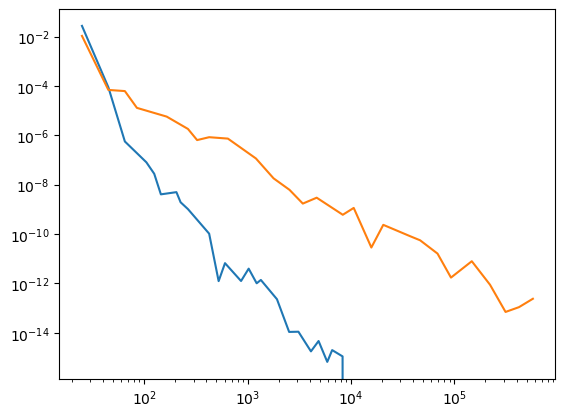

In [132]:
err_list_s = abs(f_int_list_s[0:-1] - final_int)
err_list_t = abs(f_int_list_t[0:-1] - final_int)

plt.loglog(numb_intervals_list_s[0:-1], err_list_s)
plt.loglog(numb_intervals_list_t[0:-1], err_list_t)
plt.show()